In [3]:
'''Activity Recognition/Localization using Deep Learning - ICCV 2017'''

from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
# import cv2
# import csv
import os
import sys
import time
import struct
import h5py
import scipy.io as sio
# from scipy import ndimage
from numpy import linalg as LA
from IPython.display import display, Image
# from keras.datasets import mnist
# from keras import backend as K
# from keras.models import Sequential
# from keras.utils import np_utils
# from keras.preprocessing import sequence
# from keras.layers.core import Flatten, Dense, Dropout, Activation
# from keras.layers import Embedding, LSTM
# from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
# from keras.layers import Convolution1D, MaxPooling1D
# from keras.optimizers import SGD
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
# from keras.datasets import imdb
import tensorflow as tf
#hello_world = tf.constant("Hello, TensorFlow!")
#sess = tf.Session()
#print (sess.run(hello_world))
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [10]:
# Load UCF-101 - Parse dataset
np.random.seed(1337)  # for reproducibility

# Load data folders
#data_path = '/home/angels/Documents/ICCV/UCF-10-CaffeFeat/';
data_path1 = '/media/sasghariesfeden/DATAPART3/Datasets_Sadjad/UCF101/UCF-8-CaffeFeat/'
data_path2 = '/media/sasghariesfeden/DATAPART3/Datasets_Sadjad/UCF101/UCF-8-OF-CaffeFeat/UCF-8-OF-CaffeFeat'

# Load pre-trained weights and define VGG-19 model
#weights_path = '/home/arates/CVPR_ActivityRecogn/vgg19_weights.h5'

# Define the feature size - after fc-6 from VGG-19
#feature_size = [4096,1]
# Prepare dataset - data paths and labels
# Load RGB images Caffe features and OF Caffe features
data1 = os.listdir(data_path1)[1:]
data2 = os.listdir(data_path2)[1:]

In [11]:
data1 = [os.path.join(data_path1,action) for action in data1]
data2 = [os.path.join(data_path2,action) for action in data2]
final_data1 = []
final_data2 = []
labels = []
num_action = 1
test = []
for action1 in data1:
    a = os.listdir(action1)[1:]
    test.append(a)
    aa = [os.path.join(action1, subject) for subject in a]
    for item in aa:
        final_data1.append(item)
        labels.append(num_action)
    num_action += 1

test2 = []
for action2 in data2:
    a = os.listdir(action2)[1:]
    test2.append(a)
    aa = [os.path.join(action2, subject) for subject in a]
    for item in aa:
        final_data2.append(item)

In [12]:
print(len(final_data1))
print(len(final_data2))
print(len(labels))

1121
1121
1121


In [13]:
# Randomize
np.random.seed(4294967295)
permutation = np.random.permutation(len(final_data1))
final_data1 = [final_data1[perm] for perm in permutation]
final_data2 = [final_data2[perm] for perm in permutation]
labels = [labels[perm] for perm in permutation]

In [14]:
print(len(final_data1))
print(len(final_data2))
print(len(labels))

1121
1121
1121


In [15]:
# 8 actions - drop 29 videos after randomize
final_data1 = final_data1[:1100]
final_data2 = final_data2[:1100]
labels = labels[:1100]

#Select training and testing (75% and 25%)
X_train1 = final_data1[:825]
X_train2 = final_data2[:825]
y_train = labels[:825]
X_test1 = final_data1[825:]
X_test2 = final_data2[825:]
y_test = labels[825:]

print(len(X_train1))
print(len(X_train2))
print(len(y_train))
print(len(X_test1))
print(len(X_test2))
print(len(y_test))

825
825
825
275
275
275


In [16]:
def VGG_19(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [17]:
# Test pretrained model
# Load pre-trained weights and define VGG-19 model
weights_path = '/Users/angelsrates/Documents/vgg19_weights.h5'
model = VGG_19(weights_path)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

NameError: global name 'Sequential' is not defined

In [8]:
from sklearn.preprocessing import StandardScaler
import h5py

def load_video(folder):
    """Load the feature data for a single video."""
    images_files = os.listdir(folder)
    #dataset = np.ndarray(shape=(len(images_files), 9216),
    #                         dtype=np.float32)
    dataset = np.zeros(shape=(9216, 200),
                             dtype=np.float32)
    num_img = 0
    for image in images_files:
        if num_img == 200:
            break
        image_file = os.path.join(folder, image)
        feat = sio.loadmat(image_file)
        feat = feat['deepcaffe']
        feat = np.squeeze(feat)
        dataset[:, num_img] = feat
        num_img = num_img + 1
    dataset = np.fft.ifftn(np.fft.fftn(dataset, (200,200), axes=(0,0)).astype(float), axes=(0,0)).astype(float)
    dataset = StandardScaler().fit_transform(dataset)

    dataset = np.squeeze(np.reshape(dataset, (40000)))
    return dataset

def load_video_OF(folder):
    """Load the feature data for a single video."""
    images_files = os.listdir(folder)
    #dataset = np.ndarray(shape=(len(images_files), 9216),
    #                         dtype=np.float32)
    dataset = np.zeros(shape=(9216, 200),
                             dtype=np.float32)
    num_img = 0
    for image in images_files:
        if num_img == 200:
            break
        image_file = os.path.join(folder, image)
        feat = h5py.File(image_file)
        feat = feat['deepcaffe']
        feat = np.squeeze(feat)
        dataset[:, num_img] = feat
        num_img = num_img + 1
    dataset = np.fft.ifftn(np.fft.fftn(dataset, (200,200), axes=(0,0)).astype(float), axes=(0,0)).astype(float)
    dataset = StandardScaler().fit_transform(dataset)

    dataset = np.squeeze(np.reshape(dataset, (40000)))
    return dataset

/Users/angelsrates/miniconda3/envs/deepvision/lib/python2.7/site-packages/ipykernel/__main__.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/angelsrates/miniconda3/envs/deepvision/lib/python2.7/site-packages/ipykernel/__main__.py:44: ComplexWarning: Casting complex values to real discards the imaginary part


Caffe features from RGB images (40000,)
Minimum value -0.605287182702
Maximum value 7.63057469637
Mean -1.70530256582e-17
Std 0.796868872525
Caffe features from Optical Flow (40000,)
Minimum value -0.560431582459
Maximum value 7.87833440163
Mean 0.0
Std 0.793725393319


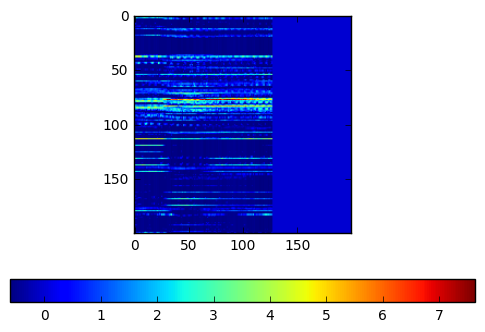

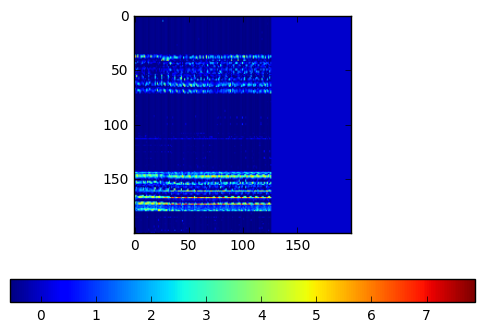

In [78]:
video = load_video(X_train1[0])
video2 = load_video_OF(X_train2[0])

print('Caffe features from RGB images', video.shape)
print('Minimum value', np.amin(video))
print('Maximum value', np.amax(video))
print('Mean', np.mean(video))
print('Std', np.std(video))

print('Caffe features from Optical Flow', video2.shape)
print('Minimum value', np.amin(video2))
print('Maximum value', np.amax(video2))
print('Mean', np.mean(video2))
print('Std', np.std(video2))

video = np.reshape(video, (200,200))
video2 = np.reshape(video2, (200,200))

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
im1 = ax1.imshow(video)
im2 = ax2.imshow(video2)
fig1.colorbar(im1, orientation='horizontal')
fig2.colorbar(im2, orientation='horizontal')
plt.show()

In [23]:
# # Given a single sequence, read every frame and extract VGG-19 (fc-6)
# def load_video(folder):
#     """Load the feature data for a single video."""
#     images_files = os.listdir(folder)
#     dataset = np.ndarray(shape=(4096, len(images_files)),
#                              dtype=np.float32)
#     num_img = 0
#     for image in images_files:
#         image_file = os.path.join(folder, image)
#         try:
#           image_data = cv2.resize(cv2.imread(image_file), (224, 224)).astype(np.float32)
#           image_data[:,:,0] -= 103.939
#           image_data[:,:,1] -= 116.779
#           image_data[:,:,2] -= 123.68
#           image_data = image_data.transpose((2,0,1))
#           image_data = np.expand_dims(image_data, axis=0)
#           get_3rd_layer_output = K.function([model.layers[0].input],
#                                       [model.layers[38].output])
#           layer_output = np.squeeze(np.transpose(get_3rd_layer_output([image_data])[0]))
#           dataset[:, num_img] = layer_output
#           num_img = num_img + 1
#         except IOError as e:
#           print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
#     return dataset

In [19]:
from sklearn.decomposition import PCA
from scipy import stats
# Feature dimensionality reduction to 50 components
pca = PCA(n_components=50)

def normalize_video(dataset):    
    #dataset = stats.zscore(dataset, axis=1, ddof=1)
    #print('Full dataset tensor:', dataset.shape)
    #print('Mean:', np.mean(dataset))
    #print('Standard deviation:', np.std(dataset))
    if np.isnan(np.mean(dataset)) and np.isnan(np.std(dataset)):
       return None
    dataset = pca.fit_transform(dataset)
    return dataset

In [9]:
def make_dataset(data_folders1, data_folders2, labels):
  dataset1 = []
  dataset2 = []
  #dataset = np.zeros(shape=(len(data_folders),1843200))
  cnt = 0
  for folder in data_folders1:
    print('Reading %s.' % folder)
    if '.DS_Store' not in folder:
        video1 = load_video(folder)
    #video = normalize_video(video)
    #if video is not None:
    #    video = np.transpose(video)
    #video = np.reshape(video, (1843200))
        dataset1.append(video1)
    #dataset[cnt, :] = np.squeeze(video)
    #print('Appended')
    else:
        labels = labels[:cnt] + labels[cnt+1:]
    cnt += 1
  for folder in data_folders2:
    print('Reading %s.' % folder)
    if '.DS_Store' not in folder:
        video2 = load_video_OF(folder)
    #video = normalize_video(video)
    #if video is not None:
    #    video = np.transpose(video)
    #video = np.reshape(video, (1843200))
        dataset2.append(video2)
    #dataset[cnt, :] = np.squeeze(video)
    #print('Appended')
  return [dataset1, dataset2, labels]

print('Loading training videos...')
[X_train1, X_train2, y_train] = make_dataset(X_train1, X_train2, y_train)
print('Loading testing videos...')
[X_test1, X_test2, y_test] = make_dataset(X_test1, X_test2, y_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

Loading training videos...
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-CaffeFeat/HeadMassage/v_HeadMassage_g12_c01.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-CaffeFeat/CuttingInKitchen/v_CuttingInKitchen_g23_c04.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-CaffeFeat/Kayaking/v_Kayaking_g06_c04.


/Users/angelsrates/miniconda3/envs/deepvision/lib/python2.7/site-packages/ipykernel/__main__.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-CaffeFeat/GolfSwing/v_GolfSwing_g21_c03.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-CaffeFeat/IceDancing/v_IceDancing_g01_c03.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-CaffeFeat/Drumming/v_Drumming_g06_c06.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-CaffeFeat/LongJump/v_LongJump_g05_c04.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-CaffeFeat/CuttingInKitchen/v_CuttingInKitchen_g01_c03.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-CaffeFeat/HeadMassage/v_HeadMassage_g22_c01.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-CaffeFeat/Basketball/v_Basketball_g20_c07.
Reading /Users/a

/Users/angelsrates/miniconda3/envs/deepvision/lib/python2.7/site-packages/ipykernel/__main__.py:44: ComplexWarning: Casting complex values to real discards the imaginary part


Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-OF-CaffeFeat/Kayaking/v_Kayaking_g06_c04.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-OF-CaffeFeat/GolfSwing/v_GolfSwing_g21_c03.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-OF-CaffeFeat/IceDancing/v_IceDancing_g01_c03.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-OF-CaffeFeat/Drumming/v_Drumming_g06_c06.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-OF-CaffeFeat/LongJump/v_LongJump_g05_c04.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-OF-CaffeFeat/CuttingInKitchen/v_CuttingInKitchen_g01_c03.
Reading /Users/angelsrates/Documents/ActionSegmentation/action-segmentation-master-Mengran/UCF-8-OF-CaffeFeat/HeadMassage/v_HeadMassage_g22_c01.

In [72]:
# # Save data files
# import cPickle as pickle
# pickle.dump(y_test, open( "/Users/angelsrates/Documents/keras_try/y_test.p", "wb" ) )
# pickle.dump( y_train, open( "/Users/angelsrates/Documents/keras_try/y_train.p", "wb" ) )
# pickle.dump( X_test, open( "/Users/angelsrates/Documents/keras_try/X_test.p", "wb" ) )
# pickle.dump( X_train, open( "/Users/angelsrates/Documents/keras_try/X_train.p", "wb" ) )

In [10]:
# Input Data 
training_data_count1 = len(X_train1)
training_data_count2 = len(X_train2)# training sequences (with no overlap between each serie)
test_data_count1 = len(X_test1) 
test_data_count2 = len(X_test2) # testing sequences
print('Full training sequences RGB:', training_data_count1)
print('Full training sequences OF:', training_data_count2)
print('Full testing sequences RGB:', test_data_count1)
print('Full testing sequences OF:', test_data_count2)
#y_train = np.asarray(y_train)
#y_test = np.asarray(y_test)
# Prepare datasets - padding
#maxlen = 200  # cut videos after this number of frames
#feat_size = 20
#print('Pad sequences (samples x time)')
#X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
#X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

X_train1 = np.asarray(X_train1)
X_train2 = np.asarray(X_train2)
X_test1 = np.asarray(X_test1)
X_test2 = np.asarray(X_test2)

print('X_train RGB shape:', X_train1.shape)
print('X_train OF shape:', X_train2.shape)
print('X_test RGB shape:', X_test1.shape)
print('X_test OF shape:', X_test2.shape)
print('Y_train shape:', y_train.shape)
print('Y_test shape:', y_test.shape)
y_train = y_train - 1
y_test = y_test - 1

Full training sequences RGB: 825
Full training sequences OF: 825
Full testing sequences RGB: 275
Full testing sequences OF: 275
X_train RGB shape: (825, 40000)
X_train OF shape: (825, 40000)
X_test RGB shape: (275, 40000)
X_test OF shape: (275, 40000)
Y_train shape: (825,)
Y_test shape: (275,)


In [ ]:
# Save data files
import cPickle as pickle
pickle.dump(y_test, open( "/Users/angelsrates/Documents/keras_try/y_test2.p", "wb" ) )
pickle.dump( y_train, open( "/Users/angelsrates/Documents/keras_try/y_train2.p", "wb" ) )
pickle.dump( X_test, open( "/Users/angelsrates/Documents/keras_try/X_test2.p", "wb" ) )
pickle.dump( X_train, open( "/Users/angelsrates/Documents/keras_try/X_train2.p", "wb" ) )

In [2]:
# import cPickle as pickle
# X_train = pickle.load( open( "X_train.p", "rb" ) )
# X_test = pickle.load( open( "X_test.p", "rb" ) )
# y_train = pickle.load( open( "y_train.p", "rb" ) )
# y_test = pickle.load( open( "y_test.p", "rb" ) )

In [11]:
def extract_batch_size(_train, step, batch_size):
    # Function to fetch a "batch_size" amount of data from "(X|y)_train" data. 
    
    shape = list(_train.shape)
    #shape = list((batch_size, 1843200))
    shape[0] = batch_size
    #shape[1] = 1843200
    batch_s = np.empty(shape)

    for i in range(batch_size):
        # Loop index
        index = ((step-1)*batch_size + i) % len(_train)
        batch_s[i] = _train[index]
        #batch_s[i] = np.reshape(load_video(_train[index]), (1,1843200))

    return batch_s

def one_hot(y_):
    # Function to encode output labels from number indexes 
    # e.g.: [[5], [0], [3]] --> [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]
    
    y_ = y_.reshape(len(y_))
    n_values = np.max(y_) + 1
    return np.eye(n_values)[np.array(y_, dtype=np.int32)]  # Returns FLOATS

In [10]:
from math import sqrt

def put_kernels_on_grid (kernel, pad = 1):

    '''Visualize conv. features as an image (mostly for the 1st layer).
    Place kernel into a grid, with some paddings between adjacent filters.
    Args:
      kernel:            tensor of shape [Y, X, NumChannels, NumKernels]
      (grid_Y, grid_X):  shape of the grid. Require: NumKernels == grid_Y * grid_X
                           User is responsible of how to break into two multiples.
      pad:               number of black pixels around each filter (between them)
    Return:
      Tensor of shape [(Y+2*pad)*grid_Y, (X+2*pad)*grid_X, NumChannels, 1].
    '''
    # get shape of the grid. NumKernels == grid_Y * grid_X
    def factorization(n):
        for i in range(int(sqrt(float(n))), 0, -1):
            if n % i == 0:
                if i == 1: print('Who would enter a prime number of filters')
                return (i, int(n / i))
    (grid_Y, grid_X) = factorization (kernel.get_shape()[3].value)
    print ('grid: %d = (%d, %d)' % (kernel.get_shape()[3].value, grid_Y, grid_X))

    x_min = tf.reduce_min(kernel)
    x_max = tf.reduce_max(kernel)

    kernel1 = (kernel - x_min) / (x_max - x_min)

    # pad X and Y
    x1 = tf.pad(kernel1, tf.constant( [[pad,pad],[pad, pad],[0,0],[0,0]] ), mode = 'CONSTANT')

    # X and Y dimensions, w.r.t. padding
    Y = kernel1.get_shape()[0] + 2 * pad
    X = kernel1.get_shape()[1] + 2 * pad

    channels = kernel1.get_shape()[2]

    # put NumKernels to the 1st dimension
    x2 = tf.transpose(x1, (3, 0, 1, 2))
    # organize grid on Y axis
    x3 = tf.reshape(x2, tf.pack([grid_X, Y * grid_Y, X, channels]))

    # switch X and Y axes
    x4 = tf.transpose(x3, (0, 2, 1, 3))
    # organize grid on X axis
    x5 = tf.reshape(x4, tf.pack([1, X * grid_X, Y * grid_Y, channels]))

    # back to normal order (not combining with the next step for clarity)
    x6 = tf.transpose(x5, (2, 1, 3, 0))

    # to tf.image_summary order [batch_size, height, width, channels],
    #   where in this case batch_size == 1
    x7 = tf.transpose(x6, (3, 0, 1, 2))

    # scaling to [0, 255] is not necessary for tensorboard
    return x7

In [11]:
def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)

In [16]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.0015
training_iters = 8250
batch_size = 125
display_step = 10

# Network Parameters
n_input = 40000
n_classes = 8
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
x1 = tf.placeholder(tf.float32, [None, n_input])
x2 = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)


# Create some wrappers for simplicity
def conv2d(x, W, b, s, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    #return x
    return tf.nn.relu(x)
    #return (s**2)/(tf.square(x) + (s**2))


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

def maxpool_t(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, 1, k, 1], strides=[1, 1, k, 1],
                          padding='SAME')


# Create model
def conv_net(x1, x2, weights, biases, dropout):
    # Reshape input picture
    x1 = tf.reshape(x1, shape=[-1, 200, 200, 1])
    x2 = tf.reshape(x2, shape=[-1, 200, 200, 1])

    # Convolution Layer 1
#     conv1 = conv2d(x, weights['wc1'], biases['bc1'], 0.1,strides=1)
#     # Max Pooling (down-sampling)
#     conv1 = maxpool2d(conv1, k=2)
    
    # Convolution Layer 1
    #conv2 = conv2d(x, weights['wc2'], biases['bc2'], sigma['s1'], strides=1)
    conv1 = conv2d(x1, weights['wc1'], biases['bc1'], 0.1, strides=1)
    # Max Pooling (down-sampling)
    #conv1 = maxpool2d(conv1, k=2)
    conv1 = maxpool_t(conv1, k=200)
    
    conv2 = conv2d(x2, weights['wc2'], biases['bc2'], 0.1, strides=1)
    # Max Pooling (down-sampling)
    conv2 = maxpool_t(conv2, k=200)
    
    # Convolution Layer 1
#     conv3 = conv2d(x, weights['wc3'], biases['bc3'], 0.1,strides=1)
#     # Max Pooling (down-sampling)
#     conv3 = maxpool2d(conv3, k=2)
    
    concat_layers = tf.concat([conv1, conv2], axis=3)
    print(concat_layers)
    #sum_layers = tf.add(conv1, conv2)
    #print(sum_layers)
    #print(concat_layers)
    #Before fully-connected - square of all outputs
#     tensor_fro = tf.norm(conv2, ord='fro', axis=[1,2])
#     #tensor_fro = tf.nn.relu(tensor_fro)
#     tensor_fro = (0.1**2)/(tf.square(tensor_fro) + (0.1**2))
#     print(tensor_fro)
    
    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(concat_layers, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    
#     fc2 = tf.reshape(conv2, [-1, weights['wd2'].get_shape().as_list()[0]])
#     fc2 = tf.add(tf.matmul(fc2, weights['wd2']), biases['bd2'])
#     fc2 = tf.nn.relu(fc2)
#     # Apply Dropout
#     fc2 = tf.nn.dropout(fc2, dropout)
    
#     fc3 = tf.reshape(conv3, [-1, weights['wd3'].get_shape().as_list()[0]])
#     fc3 = tf.add(tf.matmul(fc3, weights['wd3']), biases['bd3'])
#     fc3 = tf.nn.relu(fc3)
#     # Apply Dropout
#     fc3 = tf.nn.dropout(fc3, dropout)
    
    # Concatenation of the three FC layers
#     concat_layers = tf.concat([fc1, fc2, fc3], axis=1)
#     # Output, class prediction
#     print(fc1)
#     print(fc2)
#     print(fc3)
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    #out2 = tf.add(tf.matmul(fc2, weights['out2']), biases['out2'])
    #out3 = tf.add(tf.matmul(fc3, weights['out3']), biases['out3'])
    #out = (out1 + out2 + out3)/3
    return out

# Store layers weight & bias
weights = {
    # 1x5 conv, 1 input, 96 maps
    'wc1': tf.Variable(tf.random_normal([1, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([1, 5, 1, 32])),
    #'wc3': tf.Variable(tf.random_normal([1, 6, 1, 32])),
    'wd1': tf.Variable(tf.random_normal([400*32, 1024])),
    #'wd2': tf.Variable(tf.random_normal([100*100*32, 1024])),
    #'wd3': tf.Variable(tf.random_normal([100*100*32, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
    #'out2': tf.Variable(tf.random_normal([1024, n_classes])),
    #'out3': tf.Variable(tf.random_normal([1024, n_classes]))
    #'out': tf.Variable(tf.random_normal([96, n_classes]))
}
    
biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([32])),
    #'bc3': tf.Variable(tf.random_normal([32])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    #'bd2': tf.Variable(tf.random_normal([1024])),
    #'bd3': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
    #'out2': tf.Variable(tf.random_normal([n_classes])),
    #'out3': tf.Variable(tf.random_normal([n_classes]))
}

sigma = {
    's1': tf.Variable(tf.random_normal([1]))
}

# Add summary ops to collect data
#w_h = tf.image_summary("weights", weights['wc1'])
#b_h = tf.histogram_summary("biases", b)
# Construct model
#with tf.variable_scope('conv1') as scope_conv:
#pred = conv_net(x, weights, biases, keep_prob)
pred= conv_net(x1, x2, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Siamese architecture
# Contrastive loss
# distance = tf.sqrt(tf.reduce_sum(tf.square(tf.sub(out1,out2,out3)),1,keep_dims=True))
# distance = tf.div(self.distance, tf.add(tf.sqrt(tf.reduce_sum(tf.square(self.out1),1,keep_dims=True)),tf.sqrt(tf.reduce_sum(tf.square(self.out2),1,keep_dims=True))))
# distance = tf.reshape(self.distance, [-1], name="distance")
# loss = self.contrastive_loss(self.input_y,self.distance, batch_size) 
# correct_predictions = tf.equal(self.distance, self.input_y)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# merged_summary_op = tf.merge_all_summaries()
# # Visualize conv1 features
# with tf.variable_scope('conv1') as scope_conv:
#   tf.get_variable_scope().reuse_variables()
#   #weights = tf.get_variable('weights')
#   #grid = put_kernels_on_grid (weights)
#   #tf.image_summary('conv1/features', grid, max_images=1)

# Initializing the variables
#init = tf.global_variables_initializer()
init=tf.global_variables_initializer()

Tensor("concat_6:0", shape=(?, 400, 1, 32), dtype=float32)


In [17]:
# Launch the graph
training_iters = 8250
display_step = 10
#y_train_encoded = one_hot(y_train)
with tf.Session() as sess:
    sess.run(init)
    #summary_writer = tf.train.SummaryWriter('/Users/angelsrates/Documents/keras_try/', graph_def=sess.graph_def)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size <= training_iters:
        batch_x1 = extract_batch_size(X_train1,step,batch_size)
        batch_x2 = extract_batch_size(X_train2,step,batch_size)
        batch_y = one_hot(extract_batch_size(y_train,step,batch_size))
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x1: batch_x1, x2: batch_x2, y: batch_y,
                                       keep_prob: dropout})
        if step % display_step == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cost, accuracy], feed_dict={x1: batch_x1,
                                                              x2: batch_x2,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")
    
    # Calculate accuracy for 128 mnist test images
    test_label = one_hot(y_test)
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x1: X_test1, x2: X_test2, y: test_label, keep_prob: 1.}))

Iter 1250, Minibatch Loss= 2558.269531, Training Accuracy= 0.52800
Iter 2500, Minibatch Loss= 865.273071, Training Accuracy= 0.69600
Iter 3750, Minibatch Loss= 324.690552, Training Accuracy= 0.88800
Iter 5000, Minibatch Loss= 326.744537, Training Accuracy= 0.85600
Iter 6250, Minibatch Loss= 317.154816, Training Accuracy= 0.92800
Iter 7500, Minibatch Loss= 97.440636, Training Accuracy= 0.97600
Optimization Finished!
Testing Accuracy: 0.843636


In [13]:
def RNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, n_steps, n_input)
    # Required shape: 'n_steps' tensors list of shape (batch_size, n_input)
    
    # Permuting batch_size and n_steps
    x = tf.transpose(x, [1, 0, 2])
    # Reshaping to (n_steps*batch_size, n_input)
    x = tf.reshape(x, [-1, n_input])
    # Split to get a list of 'n_steps' tensors of shape (batch_size, n_input)
    x = tf.split(0, n_steps, x)

    # Define a lstm cell with tensorflow
    lstm_cell = rnn_cell.BasicLSTMCell(n_hidden, forget_bias=1.0)

    # Get lstm cell output
    outputs, states = rnn.rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

pred = RNN(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.initialize_all_variables()

In [16]:
training_iters = 111000
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_x = extract_batch_size(X_train,step,batch_size)
        batch_y = one_hot(extract_batch_size(y_train,step,batch_size))
        # Reshape data to get 28 seq of 28 elements
        #batch_x = batch_x.reshape((batch_size, n_steps, n_input))
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 277
    #test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
    test_data = X_test
    test_label = one_hot(y_test)
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y: test_label}))

/Users/angelsrates/miniconda3/envs/deepvision/lib/python2.7/site-packages/numpy/lib/twodim_base.py:233: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m = zeros((N, M), dtype=dtype)
/Users/angelsrates/miniconda3/envs/deepvision/lib/python2.7/site-packages/numpy/lib/twodim_base.py:240: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m[:M-k].flat[i::M+1] = 1


Iter 1110, Minibatch Loss= 1.505117, Training Accuracy= 0.45045
Iter 2220, Minibatch Loss= 1.294964, Training Accuracy= 0.48649
Iter 3330, Minibatch Loss= 1.145711, Training Accuracy= 0.57658
Iter 4440, Minibatch Loss= 1.145205, Training Accuracy= 0.59459
Iter 5550, Minibatch Loss= 1.171830, Training Accuracy= 0.55856
Iter 6660, Minibatch Loss= 0.986154, Training Accuracy= 0.57658
Iter 7770, Minibatch Loss= 0.945146, Training Accuracy= 0.63063
Iter 8880, Minibatch Loss= 1.019929, Training Accuracy= 0.60360
Iter 9990, Minibatch Loss= 0.976437, Training Accuracy= 0.61261
Iter 11100, Minibatch Loss= 0.954666, Training Accuracy= 0.63063
Iter 12210, Minibatch Loss= 1.753465, Training Accuracy= 0.64865
Iter 13320, Minibatch Loss= 1.580592, Training Accuracy= 0.43243
Iter 14430, Minibatch Loss= 1.237675, Training Accuracy= 0.54955
Iter 15540, Minibatch Loss= 1.146950, Training Accuracy= 0.56757
Iter 16650, Minibatch Loss= 1.035719, Training Accuracy= 0.56757
Iter 17760, Minibatch Loss= 0.8330